In [24]:
import pandas as pd
import os
df = pd.read_csv(r'C:\Users\pbeal\OneDrive\Documentos\GitHub\ENS5172_20241\tabelas\FE.csv' , encoding='ISO-8859-1')

cwd = os.getcwd()
#Pasta dos fatores de emissão
path = cwd+'\\tabelas\\FE' #pasta onde tenho os fatores de emissão
chapterNumber = 15
subChapter = 2
file = 'chpt_'+str(chapterNumber)+'_'+str(subChapter)+'.csv'


df

,Tipo de Fonte,PM10,"PM2,5",NOX,SO2,CO,VOC
0,"Electric arc furnace, ladle metallurgy, and me...",0.0163,0.0159,0.0998,0.0907,0.8165,0.0104
1,Ladle Metallurgical Station,0.0033,0.0019,0.0109,0.0159,0.0113,0.0015
2,"Reheat furnace, natural gas-fired",NaN,NaN,0.0862,NaN,0.0006,0.0001
3,"Annealing furnace, natural gas-fired",0.1600,0.1000,0.1179,NaN,0.0008,NaN
4,Direct reduced iron reformer,NaN,NaN,0.4355,0.0218,NaN,NaN
5,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,NaN,NaN,NaN,NaN,NaN,NaN,NaN


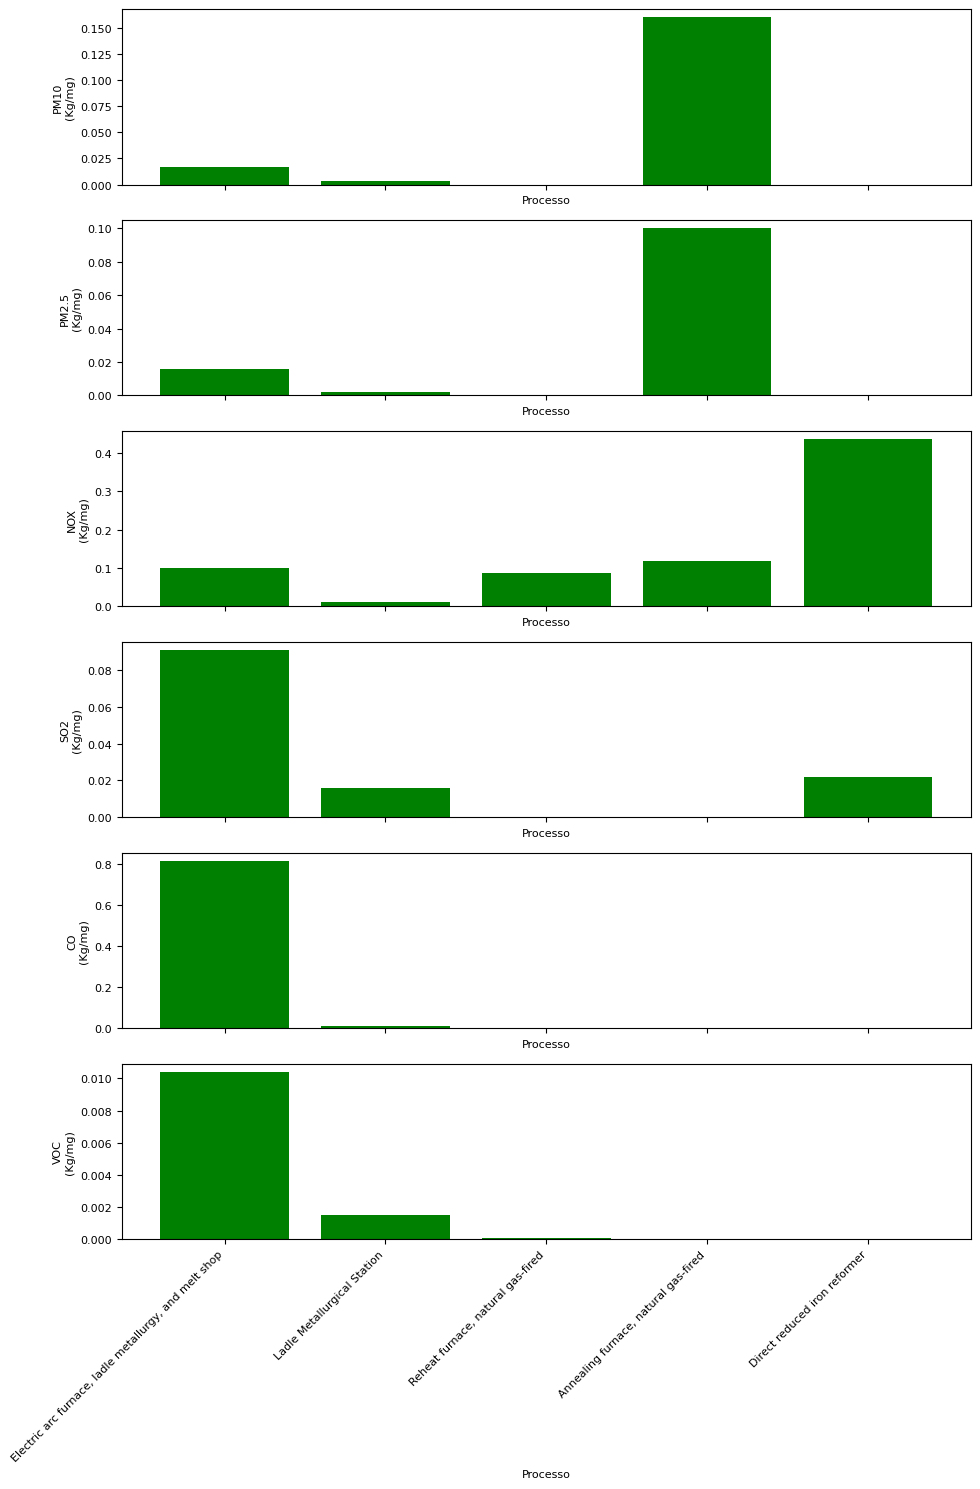

In [135]:
import matplotlib.pyplot as plt
import pandas as pd

# Definindo o DataFrame 'fe' com os dados
fe = pd.DataFrame({
    'Tipo de Fonte': ['Electric arc furnace, ladle metallurgy, and melt shop', 'Ladle Metallurgical Station', 'Reheat furnace, natural gas-fired', 'Annealing furnace, natural gas-fired', 'Direct reduced iron reformer'],
    'PM10': [0.0163, 0.0033, None, 0.1600, None],
    'PM2.5': [0.0159, 0.0019, None, 0.1000, None],
    'NOX': [0.0998, 0.0109, 0.0862, 0.1179, 0.4355],
    'SO2': [0.0907, 0.0159, None, None, 0.0218],
    'CO': [0.8165, 0.0113, 0.0006, 0.0008, None],
    'VOC': [0.0104, 0.0015, 0.0001, None, None]
})


# Criando a figura com Matplotlib
# Subplots com número de linhas igual ao número de poluentes
fig, ax = plt.subplots(len(fe.columns) - 1, 1, sharex=True, figsize=(10, 15)) # sharex significa compartilhar o eixo x

# Loop para preencher o subplot com os gráficos de barra
for ii in range(1, len(fe.columns)): # a primeira coluna é a identificação da fonte
    ax[ii-1].bar(fe['Tipo de Fonte'], fe.iloc[:,ii], color='green')
    ax[ii-1].set_xlabel('Processo', fontsize=8) # coloca o eixo x
    ax[ii-1].set_ylabel(fe.columns[ii]+'\n(Kg/mg)', fontsize=8)

    ax[ii-1].tick_params(axis='x', labelsize=8)
    ax[ii-1].tick_params(axis='y', labelsize=8)

    ax[ii-1].set_xticks(fe.index)
    ax[ii-1].set_xticklabels(fe['Tipo de Fonte'], rotation=45, ha='right', fontsize=8)

plt.tight_layout()  
plt.show()


In [139]:
#1600000 ton/ano
atv = 4384  #Considerando taxa de atividade em toneladas/dia da minha unidade de São Francisco do Sul
emis = fe*atv


emis

,Tipo de Fonte,PM10,PM2.5,NOX,SO2,CO,VOC
0,"Electric arc furnace, ladle metallurgy, and me...",71.4592,69.7056,437.5232,397.6288,3579.5360,45.5936
1,Ladle Metallurgical StationLadle Metallurgical...,14.4672,8.3296,47.7856,69.7056,49.5392,6.5760
2,"Reheat furnace, natural gas-firedReheat furnac...",NaN,NaN,377.9008,NaN,2.6304,0.4384
3,"Annealing furnace, natural gas-firedAnnealing ...",701.4400,438.4000,516.8736,NaN,3.5072,NaN
4,Direct reduced iron reformerDirect reduced iro...,NaN,NaN,1909.2320,95.5712,NaN,NaN


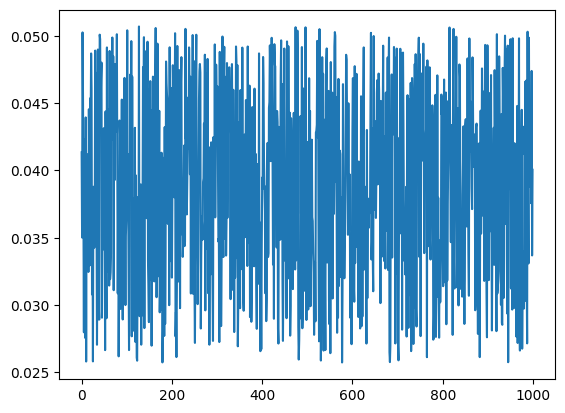

In [140]:
import numpy as np  #ton/s, transformado na mão
atvMax = 0.05073567 #(1600000 ton/ano)
atvMin = 0.0257 #(800000 ton/ano)
n = 1000
atv = (atvMax-atvMin)*np.random.rand(n) + atvMin
#print(atv)

# Criando uma figura com os valores aleatórios
fig, ax= plt.subplots()
ax.plot(atv)

In [62]:
df.iloc[:,0]

0    45
1    48
2    65
3    68
4    68
5    10
6    84
7    22
8    37
9    88
Name: Emissões, dtype: int32

In [63]:
import pandas as pd

# Criar um intervalo de datas com frequência horária
datas = pd.date_range(start='2023-01-01', end='2023-12-31', freq='h')

# Criar um DataFrame com as datas
df = pd.DataFrame({'Data': datas})

# Extrair os meses e dias das datas e adicioná-los como novas colunas no DataFrame
df['Mes'] = df['Data'].dt.month
df['Dia'] = df['Data'].dt.dayofyear  # criar um array de 1 a 365 e colocar igual a df['Dia']


# Mostrar o DataFrame resultante
df

,Data,Mes,Dia
0,2023-01-01 00:00:00,1,1
1,2023-01-01 01:00:00,1,1
2,2023-01-01 02:00:00,1,1
3,2023-01-01 03:00:00,1,1
4,2023-01-01 04:00:00,1,1
...,...,...,...
8732,2023-12-30 20:00:00,12,364
8733,2023-12-30 21:00:00,12,364
8734,2023-12-30 22:00:00,12,364
8735,2023-12-30 23:00:00,12,364


In [64]:
# Ajustar meus números aleatórios com base no comprimento do vetor de datas
atvMax = 0.05073567*3600
atvMin = 0.0257*3600  # Transformando ton/s em ton/hora 

# Criando dataframe com datas e valores de atividade aleatória
import pandas as pd
# Extraindo o número de linhas/número de datas
n = df.shape[0]

# Criando atividade aleatória
atv = (atvMax - atvMin)*np.random.rand(n) + atvMin
df['atividade'] = atv
#print(atv)
df
#df.to_csv(r'C:\Users\pbeal\OneDrive\Documentos\GitHub\ENS5172_20241\tabelas\FE.csv'encoding='ISO-8859-1')


,Data,Mes,Dia,atividade
0,2023-01-01 00:00:00,1,1,118.438713
1,2023-01-01 01:00:00,1,1,161.828652
2,2023-01-01 02:00:00,1,1,100.015509
3,2023-01-01 03:00:00,1,1,180.374871
4,2023-01-01 04:00:00,1,1,96.962002
...,...,...,...,...
8732,2023-12-30 20:00:00,12,364,161.031512
8733,2023-12-30 21:00:00,12,364,152.090109
8734,2023-12-30 22:00:00,12,364,153.097694
8735,2023-12-30 23:00:00,12,364,164.927420


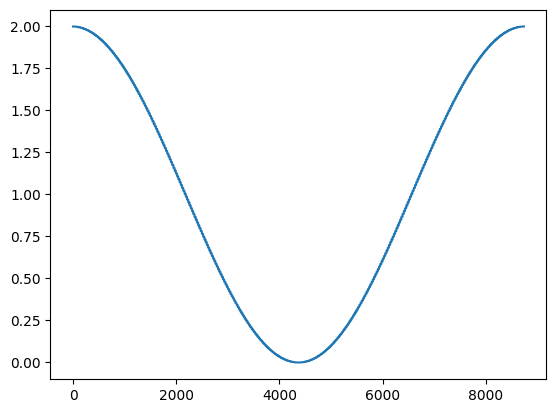

In [65]:

import numpy as np
# Criando componente sazonal
sazonalidade = np.cos((2*np.pi)*df['Dia']/365)+1

df['sazonalidade'] = sazonalidade 

df.to_csv(r'C:\\Users\\pbeal\\OneDrive\\Documentos\\GitHub\\ENS5172_20241\\tabelas\\graf.csv' , encoding='ISO-8859-1')
plt.plot(sazonalidade)

(8737,)


<Axes: >

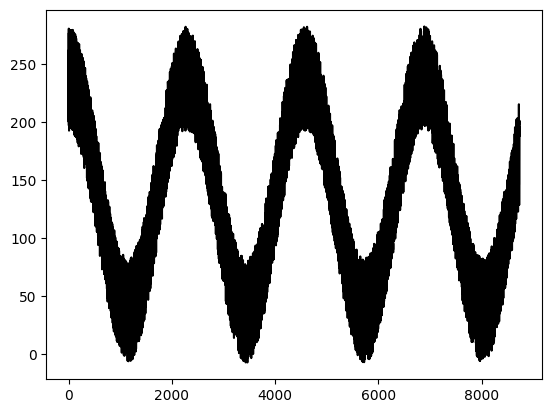

In [66]:
tt = np.arange(0,df.shape[0],1)
print(tt.shape)
df['sazonalidade'] = (np.cos(tt/(365/1)))
df['timeSeries'] = 100*df['sazonalidade']+df['atividade']
#df['sazonal'].plot()
df['timeSeries'].plot(color='black')

In [67]:
df

,Data,Mes,Dia,atividade,sazonalidade,timeSeries
0,2023-01-01 00:00:00,1,1,118.438713,1.000000,218.438713
1,2023-01-01 01:00:00,1,1,161.828652,0.999996,261.828276
2,2023-01-01 02:00:00,1,1,100.015509,0.999985,200.014008
3,2023-01-01 03:00:00,1,1,180.374871,0.999966,280.371493
4,2023-01-01 04:00:00,1,1,96.962002,0.999940,196.955997
...,...,...,...,...,...,...
8732,2023-12-30 20:00:00,12,364,161.031512,0.353531,196.384573
8733,2023-12-30 21:00:00,12,364,152.090109,0.356092,187.699317
8734,2023-12-30 22:00:00,12,364,153.097694,0.358651,188.962783
8735,2023-12-30 23:00:00,12,364,164.927420,0.361207,201.048119


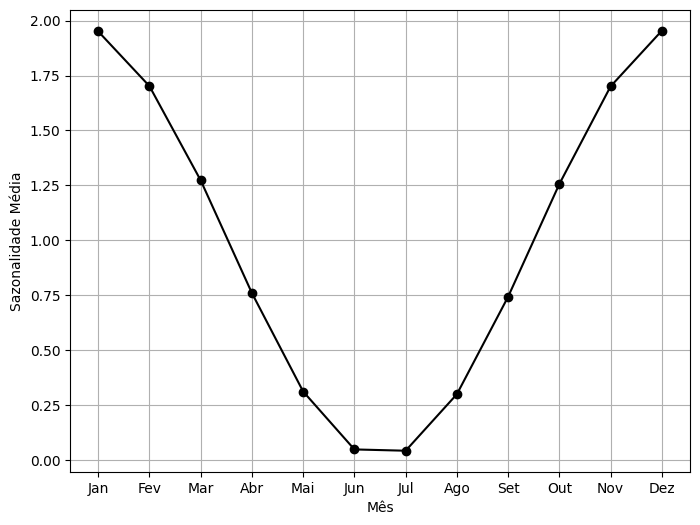

In [68]:
caminho = 'C:\\Users\\pbeal\\OneDrive\\Documentos\\GitHub\\ENS5172_20241\\tabelas\\graf.csv'
df = pd.read_csv(caminho)


media_sazonalidade = df.groupby('Mes')['sazonalidade'].mean()

# Plotar a sazonalidade média ao longo dos meses
plt.figure(figsize=(8, 6))
plt.plot(media_sazonalidade, marker='o', linestyle='-', color='black')
plt.xlabel('Mês')
plt.ylabel('Sazonalidade Média')
plt.xticks(range(1, 13), ['Jan', 'Fev', 'Mar', 'Abr', 'Mai', 'Jun', 'Jul', 'Ago', 'Set', 'Out', 'Nov', 'Dez'])
plt.grid(True)
plt.show()

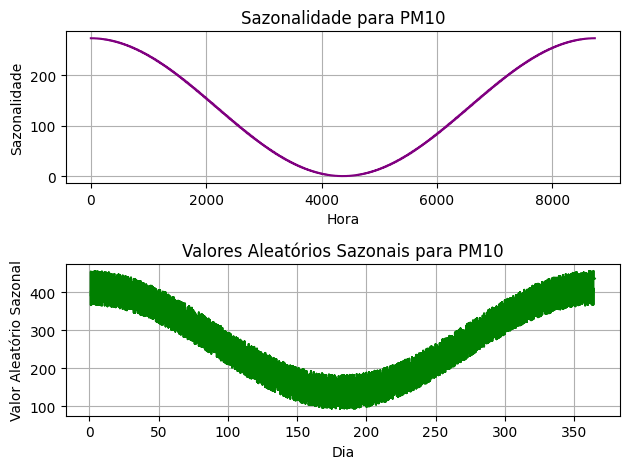

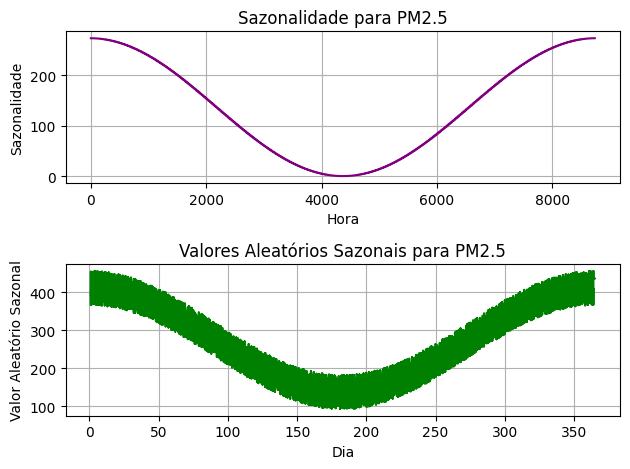

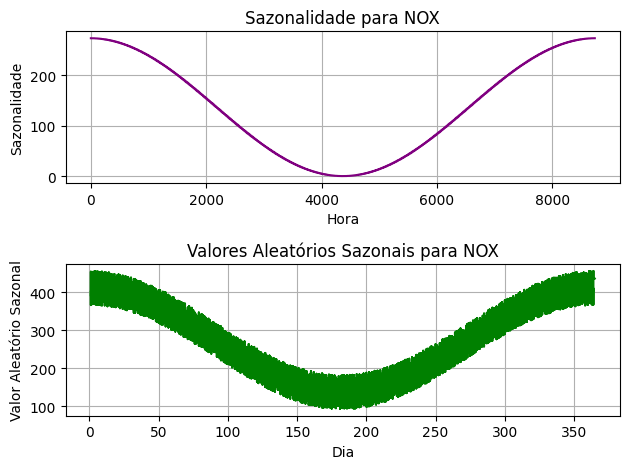

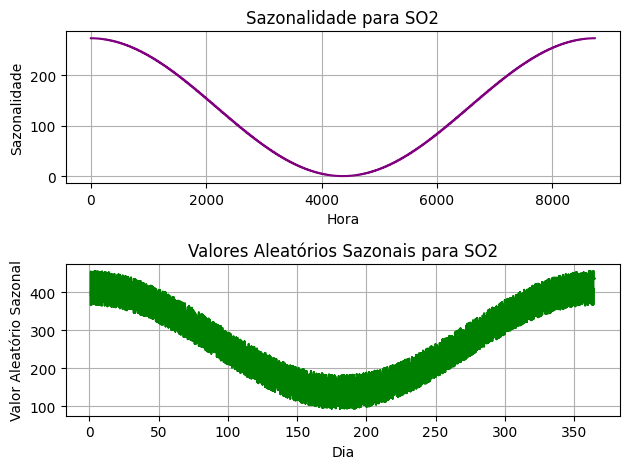

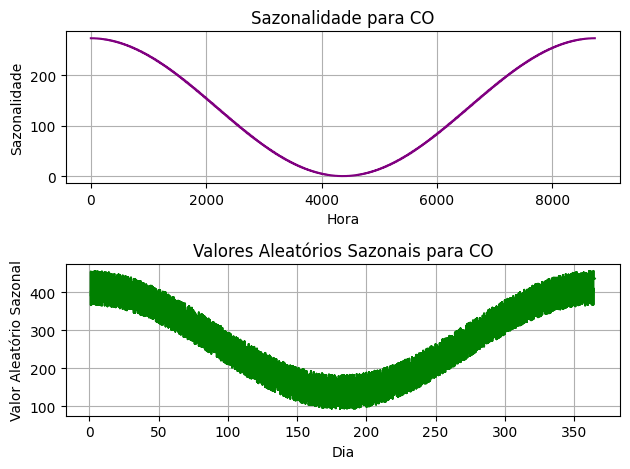

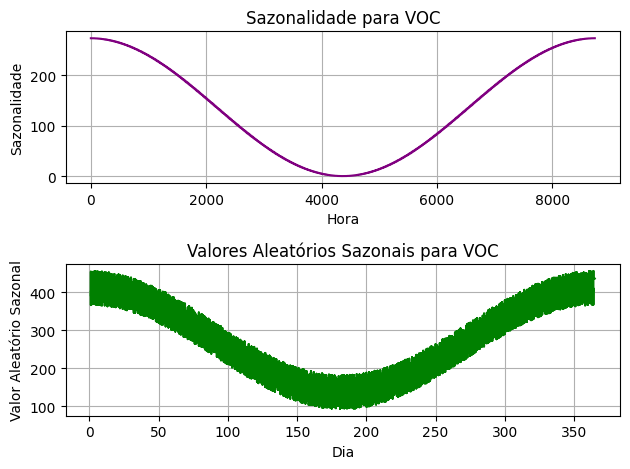

In [69]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Suponha que você tenha os dados dos poluentes em um DataFrame chamado "df_poluentes"

# Lista de poluentes
poluentes = ['PM10', 'PM2.5', 'NOX', 'SO2', 'CO','VOC']

# Para cada poluente, vamos criar os gráficos
for poluente in poluentes:
    # Criando os valores aleatórios e aleatórios sazonais
    df['aleatorio'] = (atvMax - atvMin) * np.random.rand(n) + atvMin
    aleatorioSazonal = (df['atividade'] + df['sazonalidade'] * df['atividade'].mean())
    df['aleatorioSazonal'] = aleatorioSazonal
    
    # Criando os subplots
    fig, ax = plt.subplots(2)
    
    # Plotando o gráfico dos valores aleatórios com sazonalidade
    ax[1].plot(df['Dia'], df['aleatorioSazonal'], color='green')
    ax[1].set_title('Valores Aleatórios Sazonais para {}'.format(poluente))
    ax[1].set_xlabel('Dia')
    ax[1].set_ylabel('Valor Aleatório Sazonal')
    ax[1].grid(True)
    
    # Plotando o gráfico da sazonalidade
    ax[0].plot(df['sazonalidade'] * df['atividade'].mean(), color='purple')
    ax[0].set_title('Sazonalidade para {}'.format(poluente))
    ax[0].set_xlabel('Hora')
    ax[0].set_ylabel('Sazonalidade')
    ax[0].grid(True)
    
    plt.tight_layout()
    plt.show()

In [107]:
#1600000 ton/ano
atv = 183  #Considerando taxa de atividade em toneladas/horas da minha unidade de São Francisco do Sul
emis = fe*atv


emis


,Tipo de Fonte,PM10,PM2.5,NOX,SO2,CO,VOC
0,"Electric arc furnace, ladle metallurgy, and me...",2.9829,2.9097,18.2634,16.5981,149.4195,1.9032
1,Ladle Metallurgical StationLadle Metallurgical...,0.6039,0.3477,1.9947,2.9097,2.0679,0.2745
2,"Reheat furnace, natural gas-firedReheat furnac...",NaN,NaN,15.7746,NaN,0.1098,0.0183
3,"Annealing furnace, natural gas-firedAnnealing ...",29.2800,18.3000,21.5757,NaN,0.1464,NaN
4,Direct reduced iron reformerDirect reduced iro...,NaN,NaN,79.6965,3.9894,NaN,NaN


In [108]:
# Lista de poluentes
poluentes = ['PM10', 'PM2.5', 'NOX','SO2','CO', 'VOC']

resultados_electric_arc = pd.DataFrame(index=df.index)

for poluente in poluentes:
    resultados_electric_arc[poluente] = df['atividade'] * emis.loc[0, poluente]

print("Tabela para o tipo de fonte: Electric arc furnace, ladle metallurgy, and melt shop")
resultados_electric_arc

Tabela para o tipo de fonte: Electric arc furnace, ladle metallurgy, and melt shop


,PM10,PM2.5,NOX,SO2,CO,VOC
0,353.290836,344.621122,2163.093583,1965.857595,17697.053215,225.412558
1,482.718685,470.872828,2955.541398,2686.048144,24180.356228,307.992290
2,298.336261,291.015126,1826.623244,1660.067417,14944.267320,190.349516
3,538.040202,524.836761,3294.258415,2993.880142,26951.523001,343.289454
4,289.227956,282.130338,1770.855830,1609.385008,14488.013878,184.538082
...,...,...,...,...,...,...
8732,480.340896,468.553390,2940.982911,2672.817135,24061.247964,306.475173
8733,453.669585,442.536589,2777.682491,2524.406833,22725.227996,289.457895
8734,456.675113,445.468361,2796.084432,2541.130841,22875.780947,291.375532
8735,491.962002,479.889315,3012.135450,2737.481817,24643.372695,313.889867


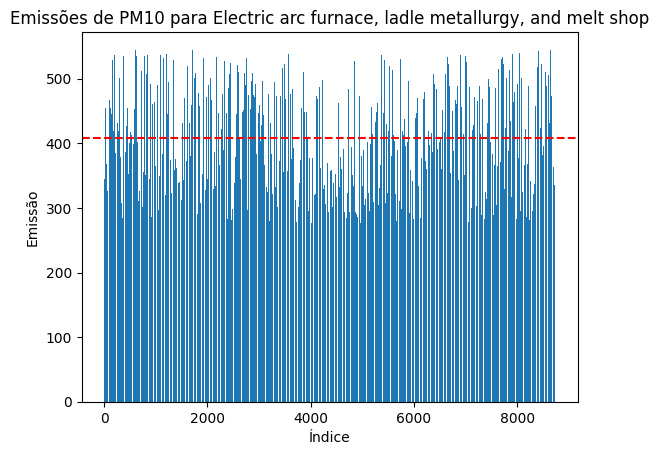

<Figure size 1200x1000 with 0 Axes>

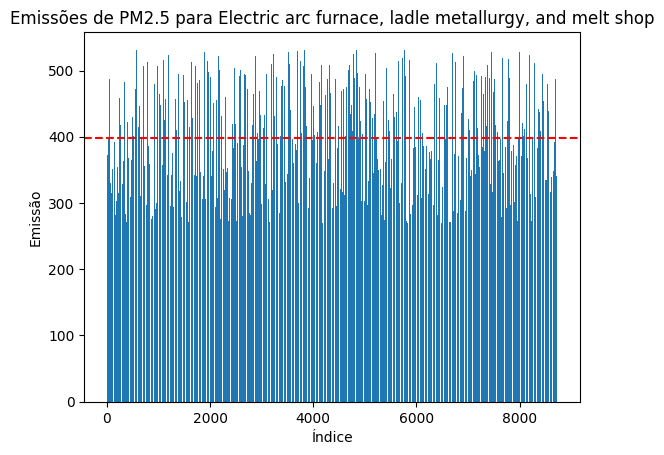

<Figure size 1200x1000 with 0 Axes>

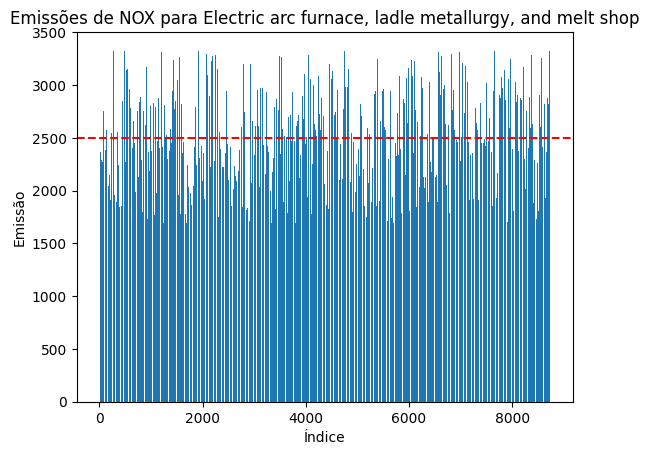

<Figure size 1200x1000 with 0 Axes>

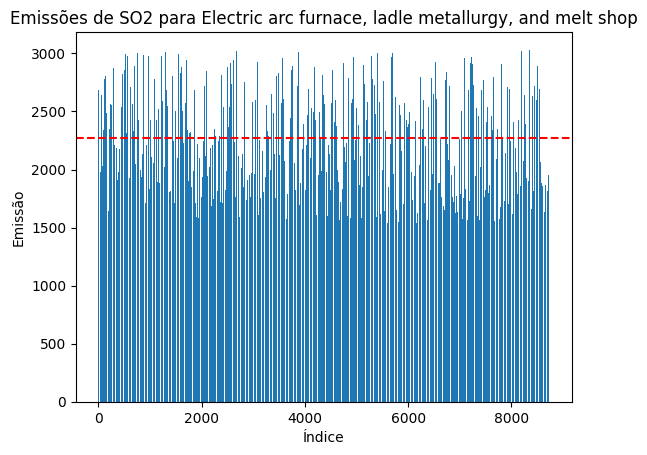

<Figure size 1200x1000 with 0 Axes>

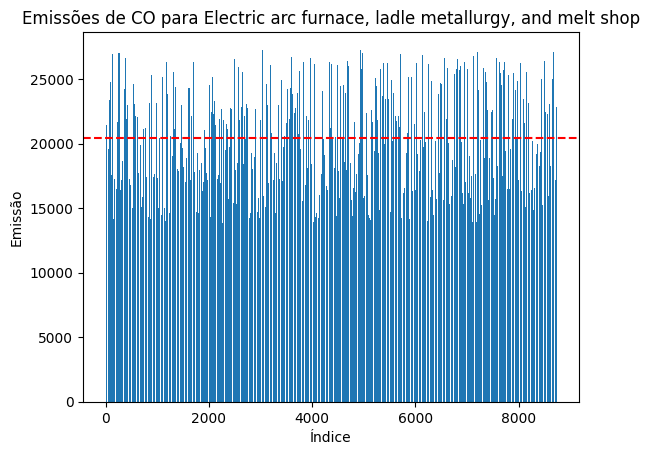

<Figure size 1200x1000 with 0 Axes>

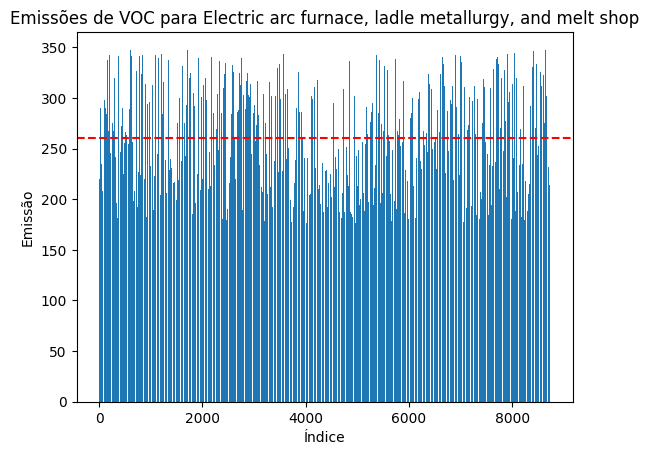

<Figure size 1200x1000 with 0 Axes>

In [193]:
#Gerando o Gráfico para Electric arc furnace, ladle metallurgy, and melt shop


import matplotlib.pyplot as plt


# Definir os poluentes como as colunas do DataFrame
poluentes =  resultados_electric_arc.columns


for poluente in poluentes:
    fig, ax = plt.subplots()
    
    
    ax.bar( resultados_electric_arc[poluente].index,  resultados_electric_arc[poluente])


    media_poluente = resultados_electric_arc[poluente].mean()
    
    # linha horizontal para representar a média
    ax.axhline(y=media_poluente, color='r', linestyle='--', label=f'Média: {media_poluente:.2f}')
    
    # Adicionar rótulos aos eixos
    ax.set_xlabel('Índice')
    ax.set_ylabel('Emissão')
    ax.set_title(f'Emissões de {poluente} para Electric arc furnace, ladle metallurgy, and melt shop')
    
    # Mostrar o gráfico
    
    plt.figure(figsize=(12, 10))
    
    plt.show()


In [109]:

resultados_Ladle_Metallurgical_Station = pd.DataFrame(index=df.index)


for poluente in poluentes:
    resultados_Ladle_Metallurgical_Station[poluente] = df['atividade'] * emis.loc[1, poluente]


print("Tabela para o tipo de fonte: Ladle Metallurgical Station")
resultados_Ladle_Metallurgical_Station

Tabela para o tipo de fonte: Ladle Metallurgical Station


,PM10,PM2.5,NOX,SO2,CO,VOC
0,71.525139,41.181140,236.249700,344.621122,244.919414,32.511427
1,97.728323,56.267822,322.799612,470.872828,334.645469,44.421965
2,60.399366,34.775392,199.500935,291.015126,206.822071,27.454257
3,108.928384,62.716343,359.793755,524.836761,372.997195,49.512902
4,58.555353,33.713688,193.410106,282.130338,200.507724,26.616070
...,...,...,...,...,...,...
8732,97.246930,55.990657,321.209556,468.553390,332.997063,44.203150
8733,91.847217,52.881731,303.374140,442.536589,314.507136,41.748735
8734,92.455698,53.232068,305.383971,445.468361,316.590722,42.025317
8735,99.599669,57.345264,328.980726,479.889315,341.053413,45.272577


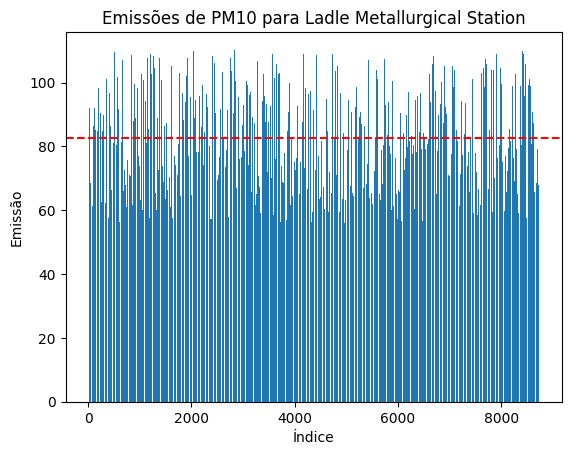

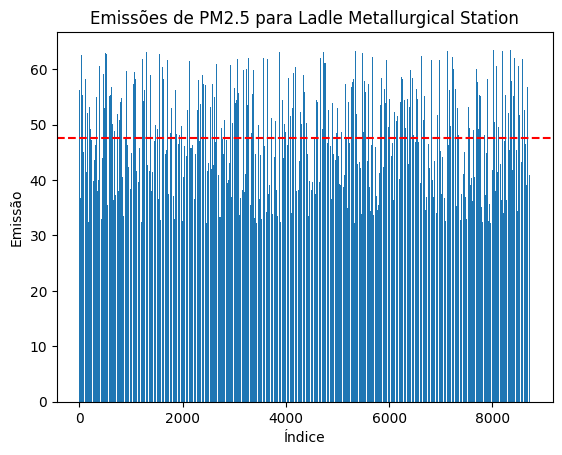

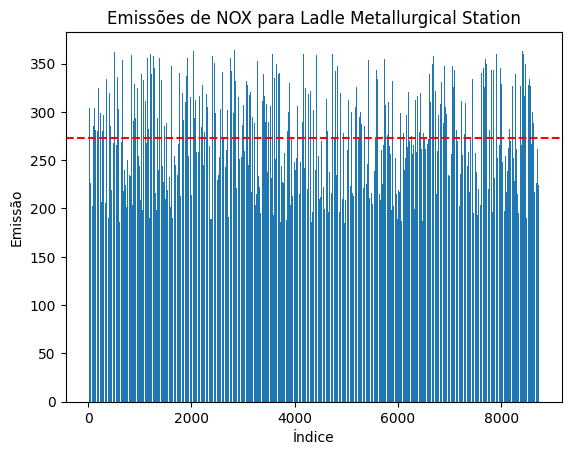

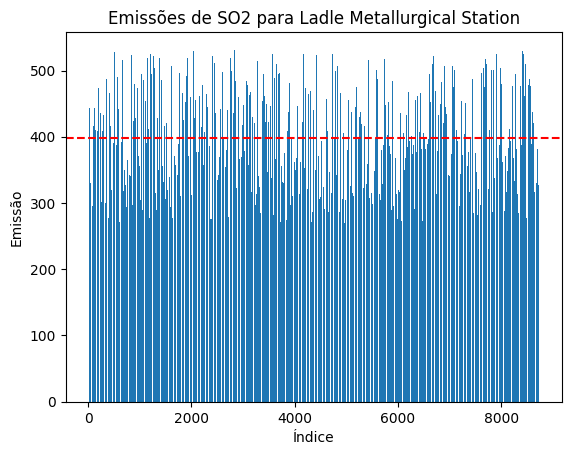

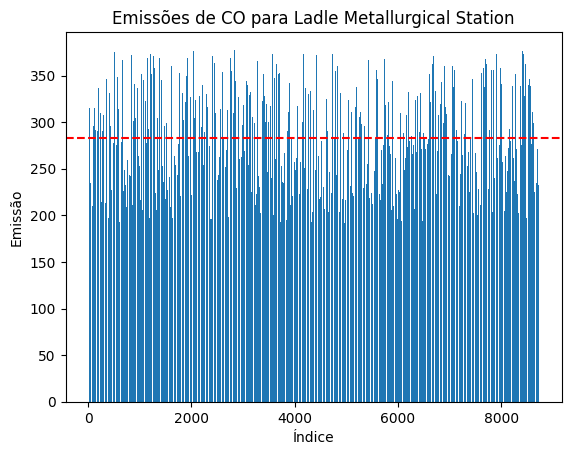

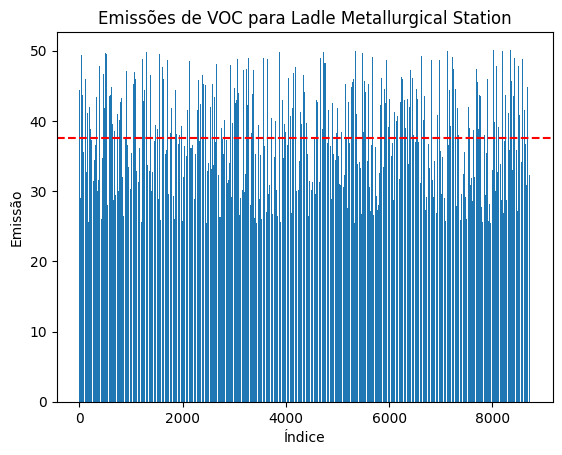

In [192]:
import matplotlib.pyplot as plt



# Definir os poluentes como as colunas do DataFrame
poluentes = resultados_Ladle_Metallurgical_Station.columns


for poluente in poluentes:
    fig, ax = plt.subplots()
    
    ax.bar(resultados_Ladle_Metallurgical_Station.index, resultados_Ladle_Metallurgical_Station[poluente])

    media_poluente = resultados_Ladle_Metallurgical_Station[poluente].mean()
    
    # T linha horizontal para representar a média
    ax.axhline(y=media_poluente, color='r', linestyle='--', label=f'Média: {media_poluente:.2f}')
    
    # Adicionar rótulos aos eixos
    ax.set_xlabel('Índice')
    ax.set_ylabel('Emissão')
    ax.set_title(f'Emissões de {poluente} para Ladle Metallurgical Station')
    
    # Mostrar o gráfico
    plt.show()

In [110]:

resultados_Reheat_furnace = pd.DataFrame(index=df.index)


for poluente in poluentes:
    resultados_Reheat_furnace[poluente] = df['atividade'] * emis.loc[2, poluente]

print("Tabela para o tipo de fonte: Reheat furnace, natural gas-fired")
resultados_Reheat_furnace

Tabela para o tipo de fonte: Reheat furnace, natural gas-fired


,PM10,PM2.5,NOX,SO2,CO,VOC
0,NaN,NaN,1868.323316,NaN,13.004571,2.167428
1,NaN,NaN,2552.782250,NaN,17.768786,2.961464
2,NaN,NaN,1577.704645,NaN,10.981703,1.830284
3,NaN,NaN,2845.341436,NaN,19.805161,3.300860
4,NaN,NaN,1529.536799,NaN,10.646428,1.774405
...,...,...,...,...,...,...
8732,NaN,NaN,2540.207685,NaN,17.681260,2.946877
8733,NaN,NaN,2399.160629,NaN,16.699494,2.783249
8734,NaN,NaN,2415.054890,NaN,16.810127,2.801688
8735,NaN,NaN,2601.664086,NaN,18.109031,3.018172


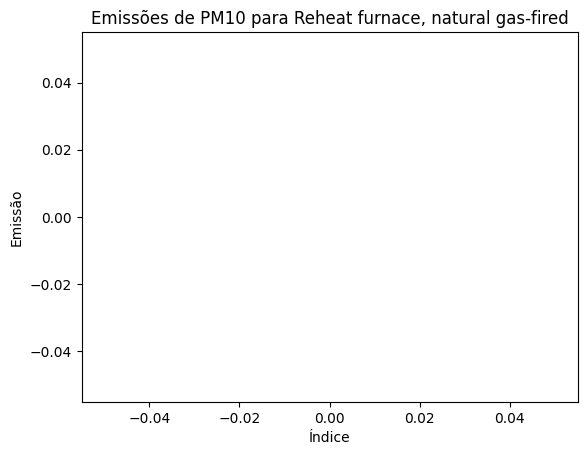

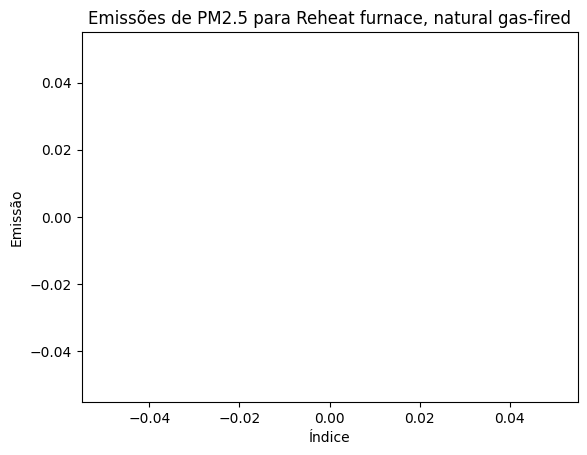

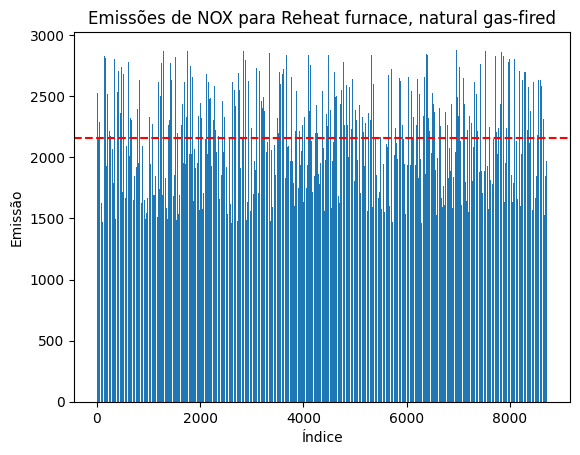

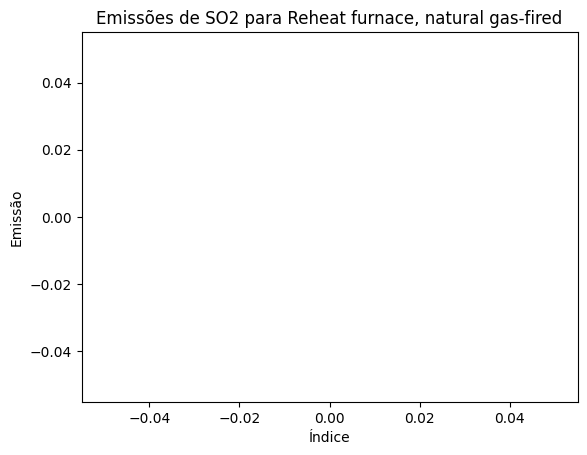

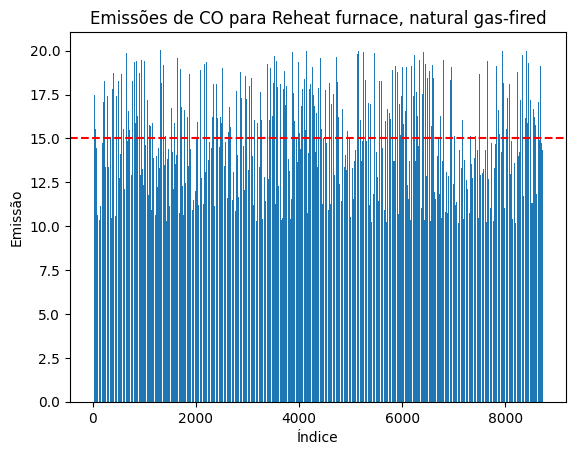

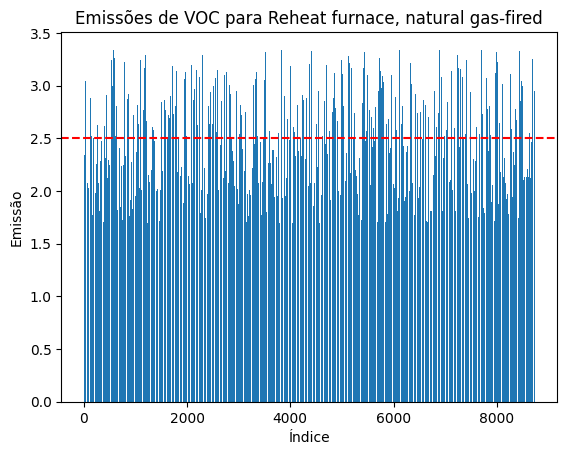

In [190]:
#Gerando o Gráfico para Reheat furnace, natural gas-fired


import matplotlib.pyplot as plt




poluentes = resultados_Reheat_furnace.columns

for poluente in poluentes: 
    fig, ax = plt.subplots()
    
    # Plotar os dados para o poluente atual em um gráfico de barras
    ax.bar(resultados_Reheat_furnace.index, resultados_Reheat_furnace[poluente])

    media_poluente = resultados_Reheat_furnace[poluente].mean()
    
    # linha horizontal para representar a média
    ax.axhline(y=media_poluente, color='r', linestyle='--', label=f'Média: {media_poluente:.2f}')
    
   
    ax.set_xlabel('Índice')
    ax.set_ylabel('Emissão')
    ax.set_title(f'Emissões de {poluente} para Reheat furnace, natural gas-fired')
    
    # Mostrar o gráfico
    plt.show()

In [111]:

resultados_Annealing_furnace = pd.DataFrame(index=df.index)


for poluente in poluentes:
    resultados_Annealing_furnace[poluente] = df['atividade'] * emis.loc[3, poluente]


print("Tabela para o tipo de fonte: Annealing furnace")
resultados_Annealing_furnace

Tabela para o tipo de fonte: Annealing furnace


,PM10,PM2.5,NOX,SO2,CO,VOC
0,3467.885505,2167.428440,2555.398131,NaN,17.339428,NaN
1,4738.342923,2961.464327,3491.566441,NaN,23.691715,NaN
2,2928.454098,1830.283811,2157.904614,NaN,14.642270,NaN
3,5281.376216,3300.860135,3891.714099,NaN,26.406881,NaN
4,2839.047423,1774.404639,2092.023069,NaN,14.195237,NaN
...,...,...,...,...,...,...
8732,4715.002663,2946.876664,3474.367587,NaN,23.575013,NaN
8733,4453.198383,2783.248989,3281.450558,NaN,22.265992,NaN
8734,4482.700492,2801.687807,3303.189925,NaN,22.413502,NaN
8735,4829.074870,3018.171794,3558.424545,NaN,24.145374,NaN


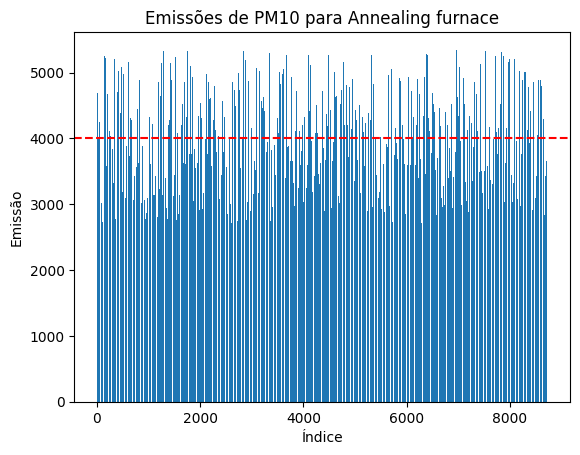

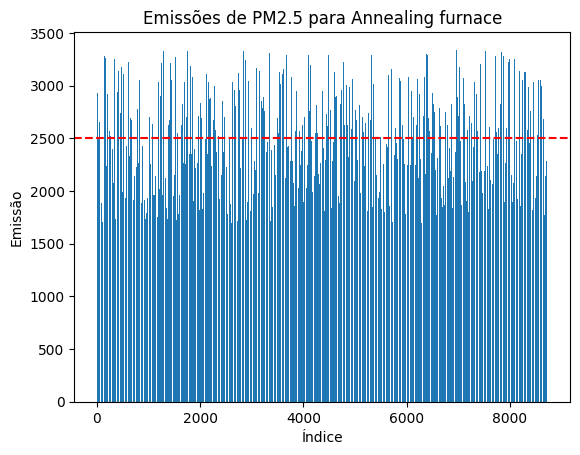

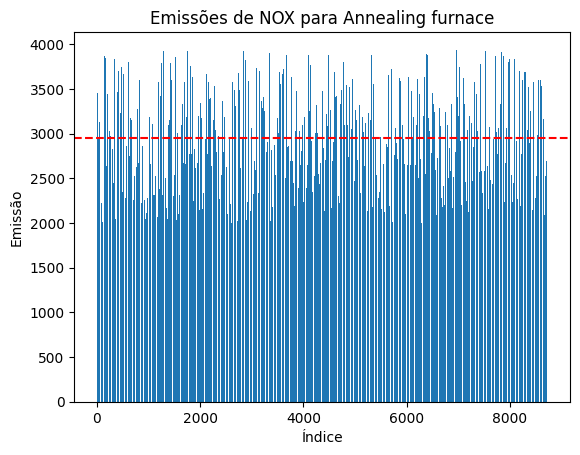

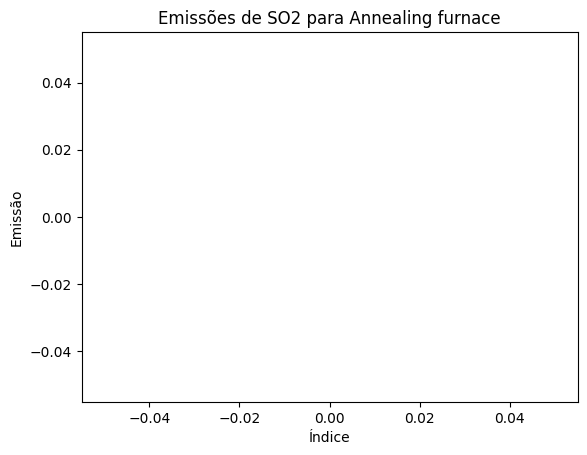

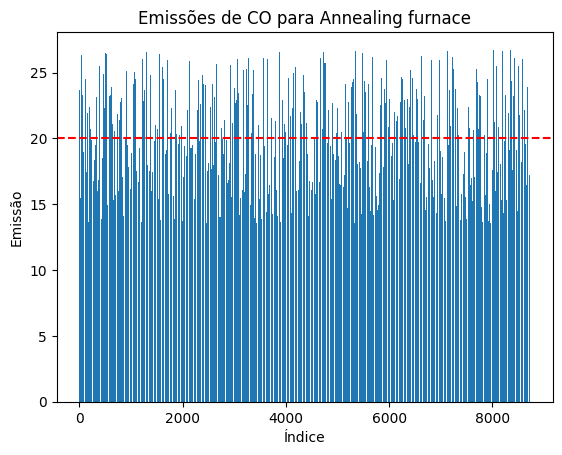

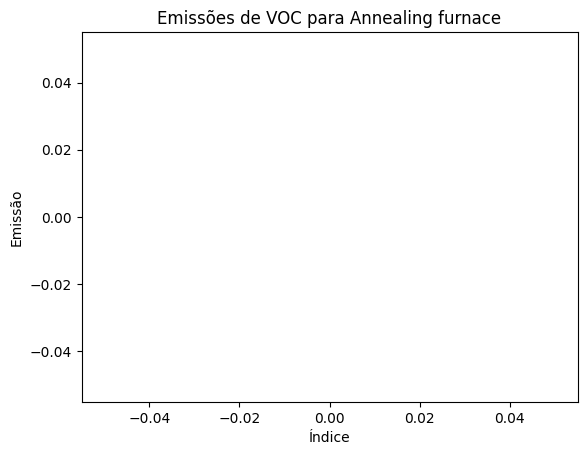

In [188]:
#Gerando o Gráfico para Annealing furnace


import matplotlib.pyplot as plt

poluentes = resultados_Annealing_furnace.columns


for poluente in poluentes:
    
    fig, ax = plt.subplots()
    
    
    ax.bar(resultados_Annealing_furnace.index, resultados_Annealing_furnace[poluente])

    media_poluente = resultados_Annealing_furnace[poluente].mean()
    
    #  linha horizontal para representar a média
    ax.axhline(y=media_poluente, color='r', linestyle='--', label=f'Média: {media_poluente:.2f}')
    
    # Adicione rótulos aos eixos
    ax.set_xlabel('Índice')
    ax.set_ylabel('Emissão')
    ax.set_title(f'Emissões de {poluente} para Annealing furnace')
    
    # Mostrar o gráfico
    plt.show()

In [113]:
resultados_Direct_reduced_iron_reformer = pd.DataFrame(index=df.index)

for poluente in poluentes:
    resultados_Direct_reduced_iron_reformer[poluente] = df['atividade'] * emis.loc[1, poluente]


print("Tabela para o tipo de fonte: Direct reduced iron reformer")

resultados_Direct_reduced_iron_reformer

Tabela para o tipo de fonte: Direct reduced iron reformer


,PM10,PM2.5,NOX,SO2,CO,VOC
0,71.525139,41.181140,236.249700,344.621122,244.919414,32.511427
1,97.728323,56.267822,322.799612,470.872828,334.645469,44.421965
2,60.399366,34.775392,199.500935,291.015126,206.822071,27.454257
3,108.928384,62.716343,359.793755,524.836761,372.997195,49.512902
4,58.555353,33.713688,193.410106,282.130338,200.507724,26.616070
...,...,...,...,...,...,...
8732,97.246930,55.990657,321.209556,468.553390,332.997063,44.203150
8733,91.847217,52.881731,303.374140,442.536589,314.507136,41.748735
8734,92.455698,53.232068,305.383971,445.468361,316.590722,42.025317
8735,99.599669,57.345264,328.980726,479.889315,341.053413,45.272577


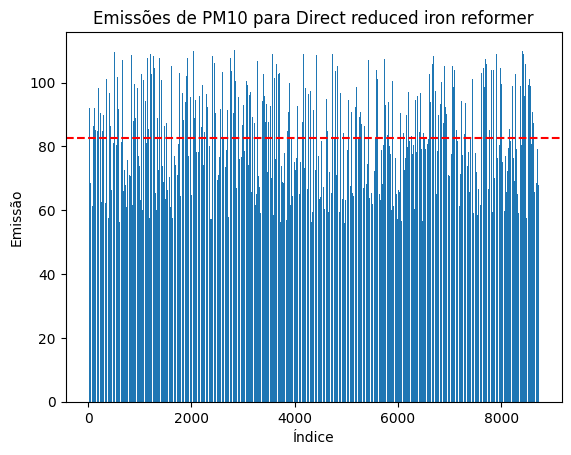

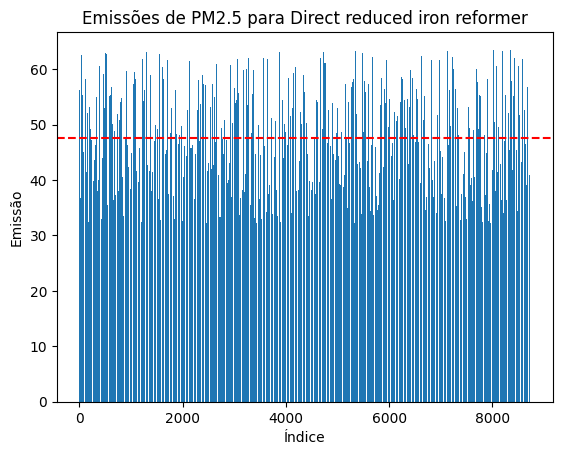

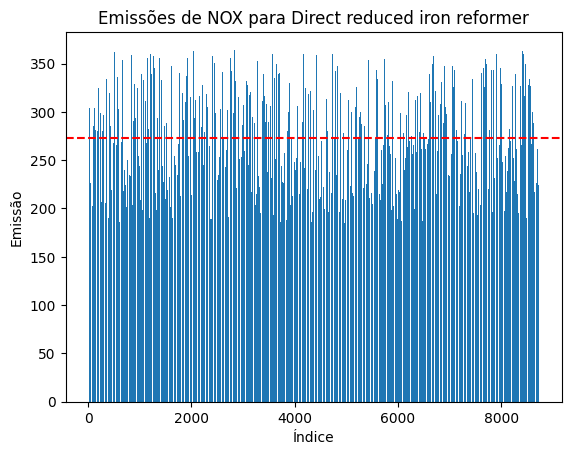

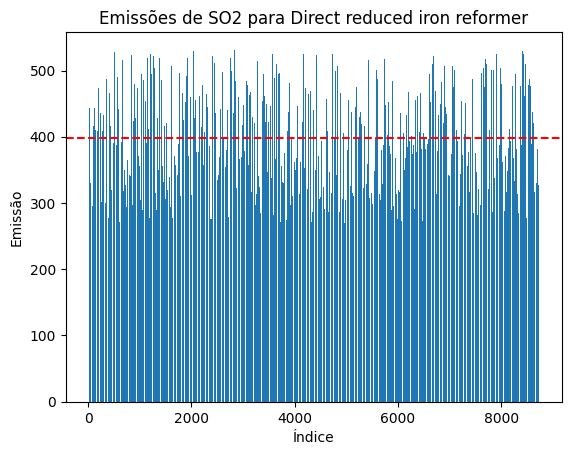

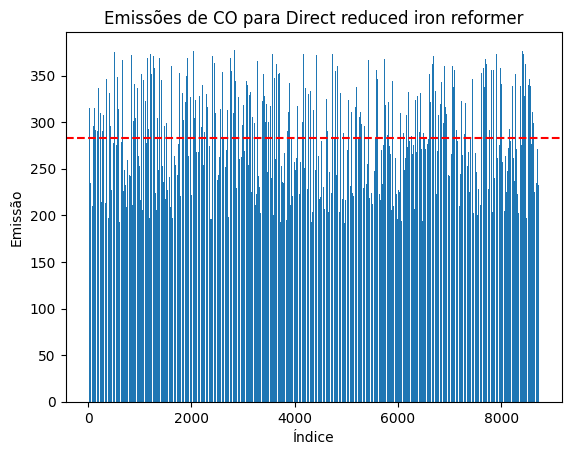

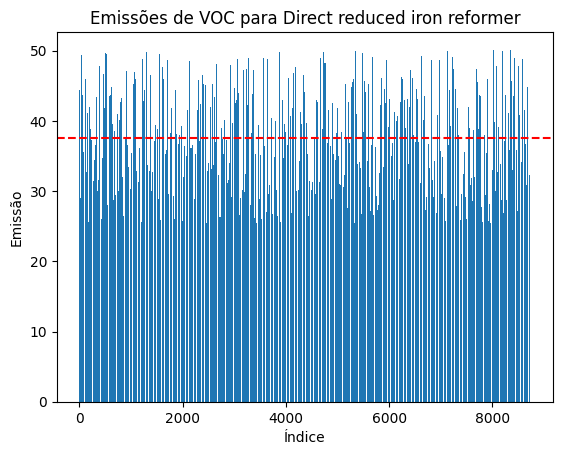

In [191]:
#Gerando o grafico Direct reduced iron reformer

import matplotlib.pyplot as plt

poluentes = resultados_Direct_reduced_iron_reformer.columns


for poluente in poluentes:
    
    fig, ax = plt.subplots()
    
    # Plotar os dados para o poluente atual
    ax.bar(resultados_Direct_reduced_iron_reformer.index, resultados_Direct_reduced_iron_reformer[poluente])

    media_poluente = resultados_Direct_reduced_iron_reformer[poluente].mean()
    
    # linha horizontal para representar a média
    ax.axhline(y=media_poluente, color='r', linestyle='--', label=f'Média: {media_poluente:.2f}')
    
    
    # Adicionar rótulos aos eixos
    ax.set_xlabel('Índice')
    ax.set_ylabel('Emissão')
    ax.set_title(f'Emissões de {poluente} para Direct reduced iron reformer')
    
    # Mostrar o gráfico
    plt.show()

In [122]:
# Somar os poluentes em cada processo
soma_por_processo = {
    'Electric arc furnace, ladle metallurgy, and melt shop': resultados_electric_arc.sum(),
    'Reheat furnace':  resultados_Reheat_furnace.sum(),
    'Annealing furnacer': resultados_Annealing_furnace.sum(),
    'Direct reduced iron reformer': resultados_Direct_reduced_iron_reformer.sum()
}

print("Soma dos poluentes em cada processo:")
for processo, soma in soma_por_processo.items():
    print(f"{processo}:")
    print(soma)
    print()

# Somar todos os poluentes de todos os processos
soma_total = resultados_electric_arc.sum() + resultados_Reheat_furnace.sum() + resultados_Annealing_furnace.sum() + resultados_Direct_reduced_iron_reformer.sum()

# Mostrar a soma total dos poluentes
print('Soma total dos poluentes de todos os processos:')
print('soma_total')

Soma dos poluentes em cada processo:
Electric arc furnace, ladle metallurgy, and melt shop:
PM10     3.571347e+06
PM2.5    3.483707e+06
NOX      2.186629e+07
SO2      1.987247e+07
CO       1.788960e+08
VOC      2.278651e+06
dtype: float64

Reheat furnace:
PM10     0.000000e+00
PM2.5    0.000000e+00
NOX      1.888651e+07
SO2      0.000000e+00
CO       1.314606e+05
VOC      2.191011e+04
dtype: float64

Annealing furnacer:
PM10     3.505617e+07
PM2.5    2.191011e+07
NOX      2.583202e+07
SO2      0.000000e+00
CO       1.752808e+05
VOC      0.000000e+00
dtype: float64

Direct reduced iron reformer:
PM10     7.230335e+05
PM2.5    4.162920e+05
NOX      2.388202e+06
SO2      3.483707e+06
CO       2.475842e+06
VOC      3.286516e+05
dtype: float64

Soma total dos poluentes de todos os processos:
soma_total


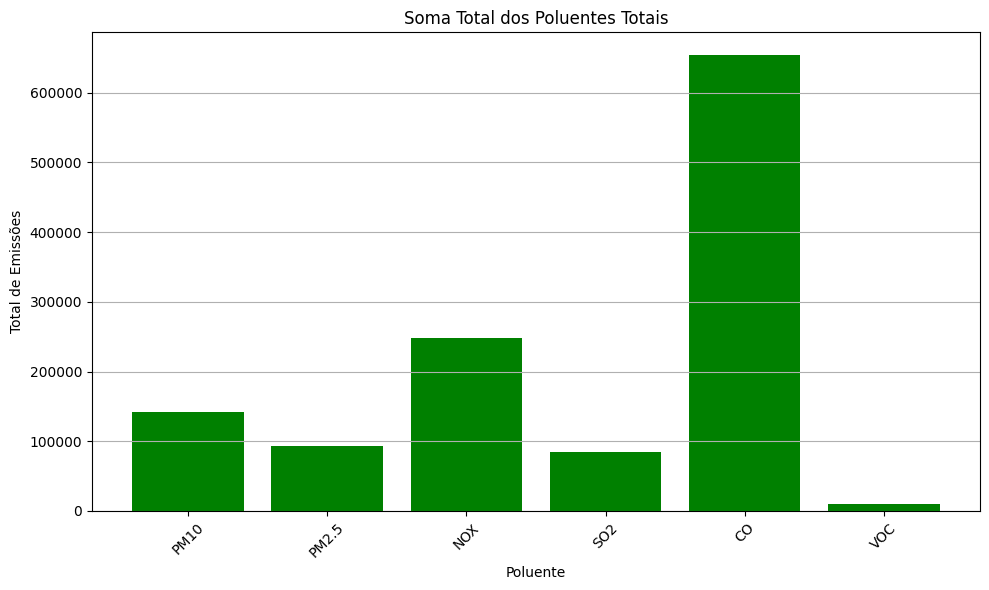

In [200]:
import matplotlib.pyplot as plt

# Calcular a soma total dos poluentes
soma_total = soma_total = resultados_electric_arc.sum() + resultados_Reheat_furnace.sum() + resultados_Annealing_furnace.sum() + resultados_Direct_reduced_iron_reformer.sum()

soma_total = soma_total/277.8

# gráfico para a soma total dos poluentes
plt.figure(figsize=(10, 6))
plt.bar(soma_total.index, soma_total.values, color='green')
plt.title('Soma Total dos Poluentes Totais')
plt.xlabel('Poluente')
plt.ylabel('Total de Emissões')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.tight_layout()
plt.show()

In [181]:
emissao_media = soma_total.mean()
emissao_minima = soma_total.min()
emissao_maxima = soma_total.max()

print("Emissão Média:", emissao_media)
print("Emissão Mínima:", emissao_minima)
print("Emissão Máxima:", emissao_maxima)

Emissão Média: 205062.18764797036
Emissão Mínima: 9464.408660675552
Emissão Máxima: 653990.6384526807


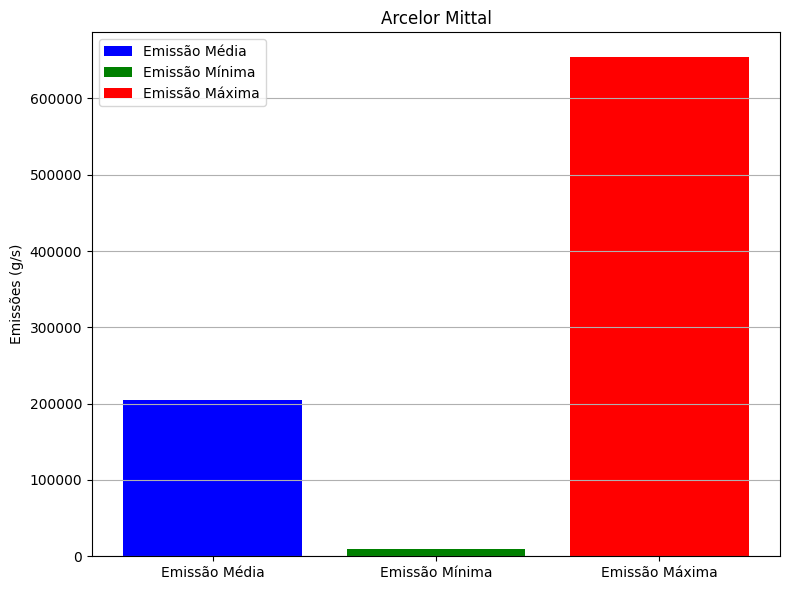

In [198]:
plt.figure(figsize=(8, 6))

# Barras para emissão média 
plt.bar('Emissão Média', emissao_media, color='blue', label='Emissão Média')

# Barras para emissão mínima 
plt.bar('Emissão Mínima', emissao_minima, color='green', label='Emissão Mínima')

# Barras para emissão máxima
plt.bar('Emissão Máxima', emissao_maxima, color='red', label='Emissão Máxima')

plt.title('Arcelor Mittal')
plt.ylabel('Emissões (g/s)')
plt.legend()
plt.grid(axis='y')
plt.tight_layout()
plt.show()